<a href="https://colab.research.google.com/github/japashira/GS_IA/blob/main/GsClassifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Instalação e Configuração de Bibliotecas**

In [32]:
# Instalando bibliotecas necessárias
!pip install shap -q
!pip install pandas matplotlib seaborn scikit-learn -q


# **Importação das Bibliotecas**

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import shap


# Dados

In [40]:
# Gerando dados para o consumo energético
np.random.seed(42)

num_samples = 1000

data = {
    "temperatura": np.random.uniform(15, 35, num_samples),  # em graus Celsius
    "radiacao_solar": np.random.uniform(200, 1000, num_samples),  # em W/m²
    "umidade": np.random.uniform(20, 80, num_samples),  # em porcentagem
    "velocidade_vento": np.random.uniform(0, 20, num_samples),  # em m/s
    "potencia": np.random.uniform(5, 100, num_samples),  # em kW
    "tensao": np.random.uniform(220, 240, num_samples),  # em Volts
    "corrente": np.random.uniform(10, 50, num_samples),  # em Amperes
    "num_habitantes": np.random.randint(1, 50, num_samples),  # número de pessoas
    "tipo_residencia": np.random.choice(["Apartamento", "Casa", "Comercial"], num_samples),
    "feriado": np.random.choice([0, 1], num_samples),  # 0 = não, 1 = sim
    "consumo_energia": np.random.uniform(50, 1000, num_samples),  # em kWh
}

df = pd.DataFrame(data)

df["classe_consumo"] = pd.cut(
    df["consumo_energia"],
    bins=[0, 200, 500, 800, np.inf],
    labels=["Baixo", "Moderado", "Alto", "Muito Alto"],
)

print("Amostra dos dados fictícios:")
df.head()


Amostra dos dados fictícios:


,temperatura,radiacao_solar,umidade,velocidade_vento,potencia,tensao,corrente,num_habitantes,tipo_residencia,feriado,consumo_energia,classe_consumo
0,22.490802,348.106343,35.702341,13.454060,59.339608,227.872710,35.930278,27,Comercial,1,378.952748,Moderado
1,34.014286,633.520758,34.818728,15.933628,81.516071,229.468713,16.895454,27,Apartamento,0,671.890134,Alto
2,29.639879,898.356669,74.375275,5.009358,77.215288,237.090948,44.895783,11,Apartamento,1,723.848580,Alto
3,26.973170,785.779909,34.972772,12.497482,19.620491,226.800088,34.524650,49,Comercial,1,606.873236,Alto
4,18.120373,845.248918,36.316984,11.434920,19.178700,237.392994,16.288155,5,Casa,0,389.379870,Moderado


# **Pré-Processamento dos Dados**

In [41]:
df["tipo_residencia"] = df["tipo_residencia"].map({"Apartamento": 0, "Casa": 1, "Comercial": 2})

X = df.drop(["consumo_energia", "classe_consumo"], axis=1)
y = df["consumo_energia"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Tamanho dos conjuntos de treino e teste:")
print("X_train:", X_train.shape, "X_test:", X_test.shape)


Tamanho dos conjuntos de treino e teste:
X_train: (800, 10) X_test: (200, 10)


# Treinamento Modelos

In [42]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {"MSE": mse, "MAE": mae, "R2": r2}

print("Resultados dos modelos:")
pd.DataFrame(results).T


Resultados dos modelos:


,MSE,MAE,R2
Linear Regression,72910.277883,231.701396,-0.006374
Decision Tree,144695.481261,316.934398,-0.997218
Gradient Boosting,84119.508249,246.795203,-0.161094


In [43]:
best_model_name = max(results, key=lambda x: results[x]["R2"])
best_model = models[best_model_name]

print(f"Melhor modelo: {best_model_name}")


Melhor modelo: Linear Regression


# **Avaliação do Modelo**

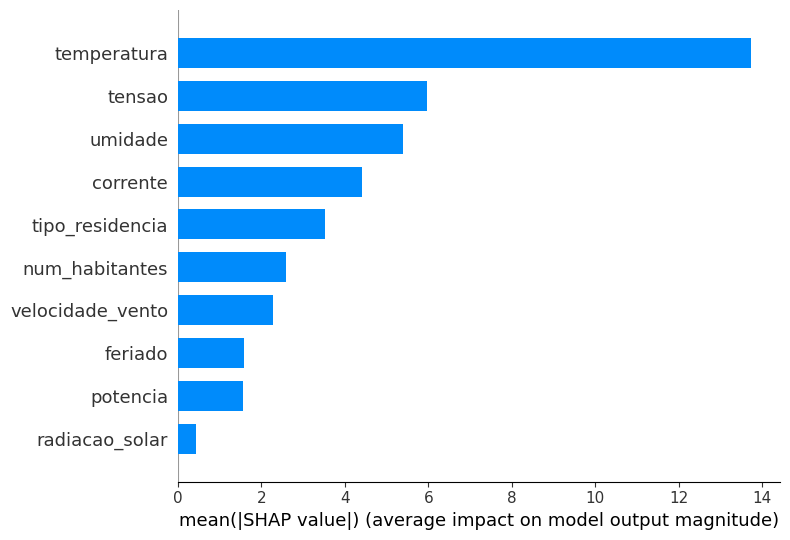

In [44]:
explainer = shap.Explainer(best_model, X_train)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test, plot_type="bar")


# **Importância das Variáveis**

In [45]:
# Avaliação do modelo selecionado
y_pred_best = best_model.predict(X_test)

print("Métricas do melhor modelo:")
print("MSE:", mean_squared_error(y_test, y_pred_best))
print("MAE:", mean_absolute_error(y_test, y_pred_best))
print("R2:", r2_score(y_test, y_pred_best))


Métricas do melhor modelo:
MSE: 72910.2778825733
MAE: 231.70139617535148
R2: -0.0063735845998413865
